In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Get_groups import phase_diagram,make_meanr

from TO_sim.gen_Distribution import Normal
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
import parmap
from pprint import pprint

In [120]:
seed =10
N = 1000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 6
t = np.arange(0,20000,1)
K = 4.3
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 1000
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

In [121]:
def get_cluster(peaks,num):
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    
    if num == 'l':

        left_l,left_r = arg_psize[0]-1,arg_psize[0]
        cluster = np.array([peaks_new[left_l],peaks_new[left_r]])
    elif num == 'r':
        right_l,right_r = arg_psize[0]+1,arg_psize[0]+2
        cluster = np.array([peaks_new[right_l],peaks_new[right_r]])
    else:
        c_l,c_r = arg_psize[num],arg_psize[num]+1
        cluster = np.array([peaks_new[c_l],peaks_new[c_r]])
    size = np.diff(cluster)[0]
    return cluster,size

def get_cluster_near(peaks,num):
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    peaks_new = [peaks[0],*peaks]
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1] 
    
    c_l,c_r = arg_psize[0]+num,arg_psize[0]+1+num
    cluster = np.array([peaks_new[c_l],peaks_new[c_r]])
    size = np.diff(cluster)[0]
    return cluster,size



# def near_main(peaks,rl):
#     num = 0
#     peaks = peaks[np.where((peaks<N)&(peaks>1))]
#     peaks_new = [peaks[0],*peaks]
#     psize = np.diff(peaks_new)
#     arg_psize = np.argsort(psize)[::-1] 
#     left_l,left_r = arg_psize[num]-1,arg_psize[num]
#     l_cluster = np.array([peaks_new[left_l],peaks_new[left_r]])
    
#     right_l,right_r = arg_psize[num]+1,arg_psize[num]+2
#     r_cluster = np.array([peaks_new[right_l],peaks_new[right_r]])
#     return l_cluster,r_cluster


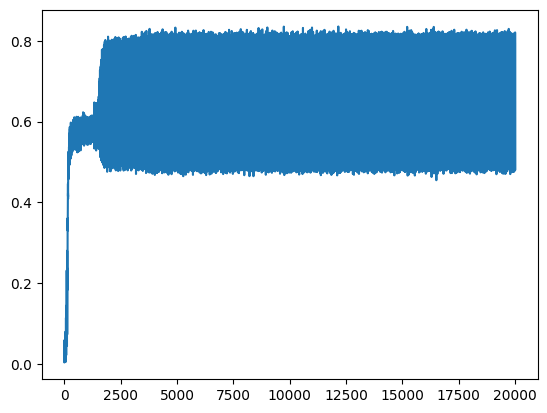

In [122]:
plt.plot(t,rs)

#### main cluster를 먼저 확인해 보고, 메인 클러스터의 근처의 피크에서 다른 클러스터 들이 나왔는지 확인한다
#### main cluster를 판별하고, 그 클러스터가 메인 클러스터 보다 큰지 혹은 작은지 확인해서 좌 우 를 분리해서 정리한다.
#### main cluster의 frame을 정리하고 그 frame을 기준으로 좌 우로 어떻게 되었는지 확인한다.
>> 시간에 대해서는 어떻게 변하는지 확인하는 것은 힘듦

In [123]:
class class_Test:
    def __init__(self,data):
        self.data = data
        print(self.data)
    def re_print(self):
        print(self.data)

In [124]:
A = class_Test('temp')

temp


In [125]:
A.__init__('asdfasF')

asdfasF


In [126]:
A.re_print()

asdfasF


## Psize를 기준으로 처음에 정렬, main cluster의 좌우를 비교

In [127]:
class cluster:
    def __init__(self,avg_dtheta=avg_dtheta,iter_time = 1000):
        self.avg_dtheta = avg_dtheta
        def to_cluster(num,arg,arg_psize):
            C = arg_psize[num],arg_psize[num]+1
            arg_C = peaks_new[C[0]],peaks_new[C[1]]
            cluster = arg[arg_C[0]:arg_C[1]]
            return cluster
        
        for index in range(-iter_time,0):
            arg = np.argsort(avg_dtheta[index])
            SD = avg_dtheta[index][arg]
            diff_dtheta = np.diff([SD[0],*SD])
            peaks, P  = find_peaks(diff_dtheta, height=0.01)
            peaks = peaks[np.where((peaks<N)&(peaks>1))]

            peaks_new = np.array([peaks[0],*peaks])
            psize = np.diff(peaks_new)
            arg_psize = np.argsort(psize)[::-1]
            if iter_time == 0:
                for i in range(10):
                    C = arg_psize[i],arg_psize[i]+1
                    arg_C = peaks_new[C[0]],peaks_new[C[1]]
                    cluster = arg[arg_C[0]:arg_C[1]]
                    if N//2 in cluster:
                        main_i = i
                        break
                    else:
                        main_i = np.nan
                    main_10 = arg_psize[:10]
                    L_cluster_idx = main_10[main_10>main_i]
                    R_cluster_idx = main_10[main_10<main_i]

            if iter_time == 1:
                for i in range(10):
                    C = arg_psize[i],arg_psize[i]+1
                    arg_C = peaks_new[C[0]],peaks_new[C[1]]
                    cluster = arg[arg_C[0]:arg_C[1]]
                    if N//2 in cluster:
                        main_i = i
                        break
                    else:
                        main_i = np.nan
                    main_10 = arg_psize[:10]
                    L_cluster_idx1 = main_10[main_10>main_i]
                    R_cluster_idx1 = main_10[main_10<main_i]

In [128]:
A = [1,1,2]
for i in range(10):
    A = np.c_[A,[1,1,1]]

In [129]:
type(peaks_new)

numpy.ndarray

In [130]:
# def to_cluster(i,arg_psize=arg_psize,peaks_new=peaks_new,arg=arg):
#     C = arg_psize[i],arg_psize[i]+1
#     arg_C = peaks_new[C[0]],peaks_new[C[1]]
#     cluster = arg[arg_C[0]:arg_C[1]]
#     return cluster

def to_cluster(idx,peaks_new=peaks_new,arg=arg):
    C = idx,idx+1
    arg_C = peaks_new[C[0]],peaks_new[C[1]]
    cluster = arg[arg_C[0]:arg_C[1]]
    return cluster

In [131]:
peaks

array([  4,   7,  10,  12,  14,  18,  21,  23,  28,  30,  34,  39,  41,
        46,  48,  50,  52,  59,  62,  65,  68,  74,  76,  79,  83,  86,
        92,  99, 103, 107, 110, 126, 131, 136, 138, 153, 155, 163, 165,
       170, 172, 184, 187, 195, 207, 210, 217, 220, 222, 233, 240, 247,
       252, 255, 784, 787, 791, 798, 803, 814, 817, 827, 832, 836, 846,
       852, 857, 859, 865, 874, 878, 880, 895, 902, 909, 913, 918, 922,
       926, 932, 936, 939, 941, 945, 949, 954, 956, 959, 961, 966, 968,
       972, 974, 976, 979, 981, 985, 988, 990, 995, 997])

In [132]:
C = arg_psize[i],arg_psize[i]+1
arg_C = peaks_new[C[0]],peaks_new[C[1]]
cluster = arg[arg_C[0]:arg_C[1]]
len(cluster)

10

In [133]:
np.std(psize_array,axis=1)

array([0.        , 1.60139908, 0.67760682, 0.89162268, 0.76209973,
       0.56371535, 0.54967627, 0.58994152, 0.34322587, 0.48418075])

In [147]:
iter_time = 1000
num = 0
for index in range(-iter_time,0):
    arg = np.argsort(avg_dtheta[index])
    SD = avg_dtheta[index][arg]
    diff_dtheta = np.diff([SD[0],*SD])
    peaks, P  = find_peaks(diff_dtheta, height=0.01)
    peaks = peaks[np.where((peaks<N)&(peaks>1))]
    try:
        peaks_new = np.array([peaks[0],*peaks])
    except IndexError:
        peaks_new = np.array([0,N])

    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1]
    sort_psize = np.sort(psize)[::-1]
    if num==0:
        psize_array = sort_psize[:10]
        num+=1
    else:
        psize_array = np.c_[psize_array,sort_psize[:10]]
Is_group = np.where((np.std(psize_array,axis=1) == 0))#&(psize_array[:,-1]>10))

L_cluster = {}
R_cluster = {}
M_cluster = []
if len(Is_group[0]) !=0:
    for index in range(-iter_time,0):
        arg = np.argsort(avg_dtheta[index])
        SD = avg_dtheta[index][arg]
        diff_dtheta = np.diff([SD[0],*SD])
        peaks, P  = find_peaks(diff_dtheta, height=0.01)
        peaks = peaks[np.where((peaks<N)&(peaks>1))]

        try:
            peaks_new = np.array([peaks[0],*peaks])
        except IndexError:
            peaks_new = np.array([0,N])
        psize = np.diff(peaks_new)
        arg_psize = np.argsort(psize)[::-1]

        if -iter_time == index:
            sort_psize = np.sort(psize)[::-1]
            for i in range(10):
                C = arg_psize[i],arg_psize[i]+1
                arg_C = peaks_new[C[0]],peaks_new[C[1]]
                cluster = arg[arg_C[0]:arg_C[1]]
                if N//2 in cluster:
                    main_i = i
                main_10 = arg_psize[:10][Is_group]
                
                M_cluster_idx = main_10[main_i]
                L_cluster_idx = main_10[main_10<main_10[main_i]]
                L_cluster_g = Is_group[0][main_10<main_10[main_i]]
                R_cluster_idx = main_10[main_10>main_10[main_i]]
                R_cluster_g = Is_group[0][main_10>main_10[main_i]]
                print(M_cluster_idx,len(to_cluster(M_cluster_idx,peaks_new=peaks_new,arg=arg)))
                print(L_cluster_idx,psize[L_cluster_idx])
                print(L_cluster_idx,[len(to_cluster(Lidx,peaks_new=peaks_new,arg=arg)) for Lidx in L_cluster_idx])
                print(R_cluster_idx,psize[R_cluster_idx])
                print(R_cluster_idx,[len(to_cluster(Ridx,peaks_new=peaks_new,arg=arg)) for Ridx in R_cluster_idx])
                for i,idx in enumerate(L_cluster_idx):
                    L_c = to_cluster(idx,peaks_new=peaks_new,arg=arg)
                    L_cluster[i] = L_c
                    print('L',i,idx,len(L_c),psize[idx])
                for i,idx in enumerate(R_cluster_idx):
                    R_c = to_cluster(idx,peaks_new=peaks_new,arg=arg)
                    R_cluster[i] = R_c
                    print('R',i,idx,len(R_c),psize[idx])
                M_cluster = to_cluster(M_cluster_idx,peaks_new=peaks_new,arg=arg)
                break
        else:
            main_10 = arg_psize[:10][Is_group]
            M_cluster_idx = main_10[main_i]
            L_cluster_idx = arg_psize[:10][L_cluster_g]
            R_cluster_idx = arg_psize[:10][R_cluster_g]
            M_cluster = np.c_[M_cluster,to_cluster(M_cluster_idx,peaks_new=peaks_new,arg=arg)]
            for i,Lidx in enumerate(L_cluster_idx):
                try:
                    L_cluster[i] = np.c_[L_cluster[i],to_cluster(Lidx,peaks_new=peaks_new,arg=arg)]
                except ValueError:
                    print(L_cluster[i].shape,len(to_cluster(Lidx,peaks_new=peaks_new,arg=arg)))

            for i,Ridx in enumerate(R_cluster_idx):
                try:
                    R_cluster[i] = np.c_[R_cluster[i],to_cluster(Ridx,peaks_new=peaks_new,arg=arg)]
                except ValueError:
                    print(R_cluster[i].shape,len(to_cluster(Ridx,peaks_new=peaks_new,arg=arg)))
                    # break
                    

20 676
[19  7] [102   5]
[19  7] [102, 5]
[21 36] [93  9]
[21 36] [93, 9]
L 0 19 102 102
L 1 7 5 5
R 0 21 93 93
R 1 36 9 9


In [135]:
main_10[main_10>main_10[main_i]]

array([21, 36])

In [136]:
Is_group
R_cluster_idx

array([21, 36])

In [146]:
for i,idx in enumerate(L_cluster_idx):
    print(np.mean(np.std(np.sort(L_cluster[i],axis=0),axis=1)))
    
    

0.0
445.79234446544723


In [138]:
Is_group[0][main_10<main_10[main_i]]

array([1, 8])

In [139]:
L_cluster_g, R_cluster_g

(array([1, 8]), array([2, 3]))

In [140]:
(np.std(psize_array,axis=1) == 0)&(psize_array[:,-1]>10)

array([ True,  True,  True, False, False, False, False, False, False,
       False])

In [141]:
R_cluster

{0: array([[938, 938, 938, ..., 938, 938, 903],
        [937, 937, 937, ..., 937, 937, 902],
        [936, 936, 936, ..., 936, 936, 904],
        ...,
        [874, 848, 848, ..., 848, 848, 848],
        [872, 840, 840, ..., 840, 840, 840],
        [873, 838, 838, ..., 838, 838, 838]]),
 1: array([[983, 983, 988, ..., 984, 984, 984],
        [982, 982, 987, ..., 983, 985, 985],
        [981, 981, 986, ..., 982, 986, 986],
        ...,
        [986, 986, 982, ..., 987, 982, 988],
        [985, 985, 981, ..., 988, 981, 981],
        [989, 989, 989, ..., 989, 989, 989]])}

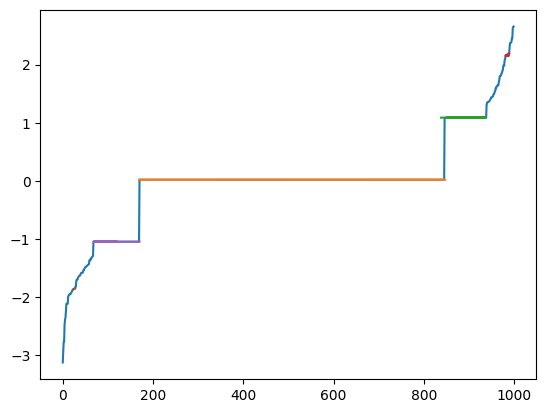

In [142]:
plt.plot(avg_dtheta[-1][arg])
plt.plot(np.sort(M_cluster[:,-1]),avg_dtheta[-1][M_cluster[:,-1]])
for i,idx in enumerate(R_cluster_idx):
    plt.plot(R_cluster[i][:,-1],avg_dtheta[-1][R_cluster[i][:,-1]])


for i,idx in enumerate(L_cluster_idx):
    plt.plot(L_cluster[i][:,-1],avg_dtheta[-1][L_cluster[i][:,-1]])



In [305]:
L_cluster_idx

array([27, 29, 12, 19])

In [294]:
L_cluster

{}

In [293]:
np.c_[M_cluster,to_cluster(main_i,arg_psize,arg)].shape


(517, 1002)

In [280]:
M_cluster.shape

(517,)

In [271]:
arg_psize[:10][Is_group],Is_group

(array([56]), (array([0]),))

In [270]:
main_10

array([55])

In [244]:
arg_psize[:10][Is_group]

array([56])

In [243]:
Is_group

(array([0]),)

In [234]:
arg_psize[:10][np.where(np.std(psize_array,axis=1) == 0)]

array([56])

In [235]:
iter_time

1000

In [236]:
main_10

NameError: name 'main_10' is not defined

In [242]:
for index in range(-iter_time,0):
    if -iter_time == index:
        print(index)

-1000


1000

In [230]:
main_i

2

In [196]:
i_ = [1]
for i in range(10):
    try:
        i_[i]
    except IndexError:
        break

In [197]:
for i in range(-10,10):
    if i == -10:
        print(i)

-10


In [192]:
def get_main_cluster(index,avg_dtheta=avg_dtheta):
    arg = np.argsort(avg_dtheta[index])
    SD = avg_dtheta[index][arg]
    diff_dtheta = np.diff([SD[0],*SD])
    peaks, P  = find_peaks(diff_dtheta, height=0.01)
    peaks = peaks[np.where((peaks<N)&(peaks>1))]

    peaks_new = np.array([peaks[0],*peaks])
    psize = np.diff(peaks_new)
    arg_psize = np.argsort(psize)[::-1]
    for i in range(100):
        C = arg_psize[i],arg_psize[i]+1
        arg_C = peaks_new[C[0]],peaks_new[C[1]]
        cluster = arg[arg_C[0]:arg_C[1]]
        if N//2 in cluster:
            main_i = i
        else:
            main_i = np.nan
    return main_i
            

In [191]:
A = cluster(-1)
A.
print(A.main_i)

2


In [151]:
get_main_cluster(-1)

2

In [152]:
v_mc = np.vectorize(get_main_cluster)

In [166]:
%timeit v_mc(-10)

149 µs ± 332 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


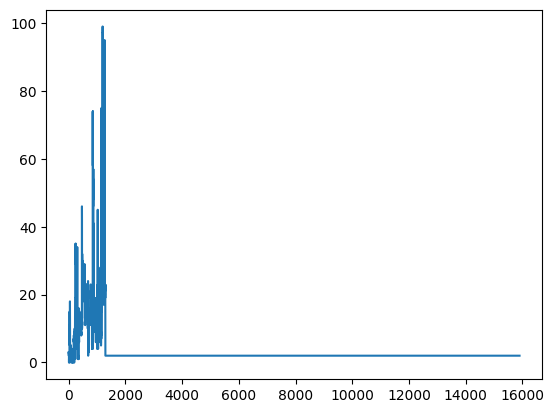

In [167]:
plt.plot(np.arange(0,len(t)-sum_time,10)*0.1,v_mc(np.arange(0,len(t)-sum_time,10)))
# plt.plot(t,rs*100)

In [124]:

for num in range(-10,10):
    C = arg_psize[main_i]+num,arg_psize[main_i]+1+num
    arg_C = peaks_new[C[0]],peaks_new[C[1]]
    cluster = arg[arg_C[0]:arg_C[1]]
    print(len(cluster))

7
5
4
8
69
12
7
3
4
204
134
184
2
12
5
8
2
13
4
18


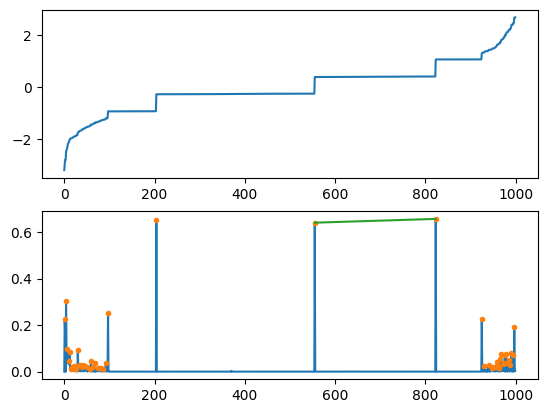

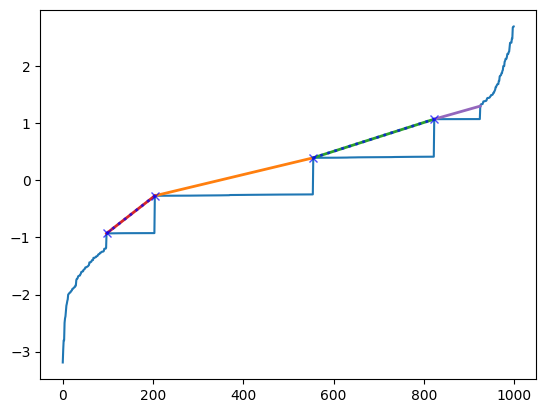

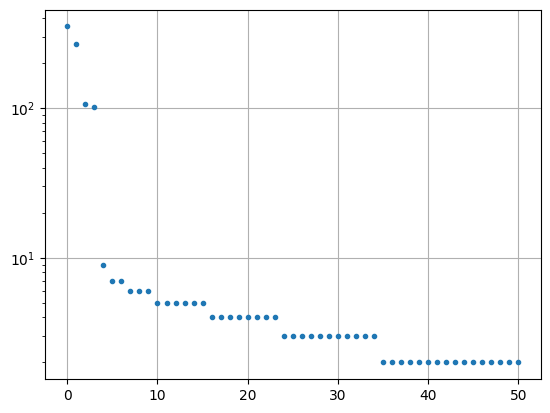

In [219]:
plt.subplot(211)
index = -1
arg = np.argsort(avg_dtheta[index])
SD = avg_dtheta[index][arg]
plt.plot(SD)
# plt.plot(avg_dtheta[1500])

plt.subplot(212)

diff_dtheta = np.diff([SD[0],*SD])

plt.plot(diff_dtheta)
peaks, P  = find_peaks(diff_dtheta, height=0.01)
HP = P['peak_heights']
# peaks = peaks[p_arg]
# peaks = peaks[np.where((peaks<N)&(peaks>1))]

# peaks_new = [peaks[0],*peaks]
# psize = np.diff(peaks_new)
# arg_psize = np.argsort(psize)[::-1] 
C_0,S_0 = get_cluster(peaks,0)
C_1,S_1 = get_cluster(peaks,1)
C_2,S_2 = get_cluster(peaks,2)
C_3,S_3 = get_cluster(peaks,3)
l_c,S_l = get_cluster(peaks,'l')
r_c,S_r = get_cluster(peaks,'r')


max_s = np.sort(diff_dtheta[peaks])[::-1][:2]
# plt.plot(0.01/diff_dtheta)
plt.plot(peaks,diff_dtheta[peaks],'.')
plt.plot(C_1,diff_dtheta[np.array(C_1)])
# plt.yscale('log')

# plt.ylim(0,10)
plt.figure()

SD = avg_dtheta[index][arg]
plt.plot(SD)
plt.plot(np.arange(N)[np.array(C_0)],SD[np.array(C_0)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_1)],SD[np.array(C_1)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_2)],SD[np.array(C_2)],lw=2,ls='-')
plt.plot(np.arange(N)[np.array(C_3)],SD[np.array(C_3)],lw=2,ls='-')
plt.plot(np.arange(N)[l_c],SD[l_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.plot(np.arange(N)[r_c],SD[r_c],lw=2,ls=':',color ='blue',alpha=0.7,marker='x')
plt.figure()
plt.plot(np.sort(np.diff(peaks))[::-1],'.')
plt.yscale('log')

plt.grid()

In [169]:
len(t)-1000

19000

In [24]:
def Group_check(avg_dtheta, groups,iter_time):
    '''input -> dtheta, groups -> `which groups`, iter_time->simulation iter time'''
    sizes = []
    mean_dthetas = []
    std_dthetas = []
    mean_omegas = []
    std_omegas = []
    cluster_idxs = []
    for i in range(-iter_time,0):
        index = i
        arg = np.argsort(avg_dtheta[index])
        SD = avg_dtheta[index][arg]
        diff_dtheta = np.diff([SD[0],*SD])
        peaks, P  = find_peaks(diff_dtheta, height=0.01)
        C,S = get_cluster(peaks,groups)
        sizes.append(S)
        cluster = arg[C[0]:C[1]]
        dtheta_c = SD[cluster]
        omega_c = omega[arg][cluster]
        D_mean = np.mean(dtheta_c)
        D_std = np.std(dtheta_c) 

        O_mean = np.mean(omega_c)
        O_std = np.std(omega_c) 
        mean_dthetas.append(D_mean)
        std_dthetas.append(D_std)
        cluster_idxs.append(cluster)
        mean_omegas.append(O_mean)
        std_omegas.append(O_std)
    c_mean_size = np.mean(sizes)
    d_mean = np.mean(mean_dthetas)
    d_std = np.mean(std_dthetas)
    o_mean = np.mean(mean_omegas)
    o_std = np.mean(std_omegas)

    
    std_size = np.std(sizes)
    Is_group = [std_size == 0][0]
    data = {'cluster_size' :  c_mean_size,
            'cluster_std':std_size,
            'dtheta_mean': d_mean,
            'dtheta_std' : d_std,
            'omega_mean': o_mean,
            'omega_std' : o_std,
            'Is_group': Is_group,
            'clsuter_size array': sizes,
            'mean_dtheta array': mean_dthetas,
            'std_dtheta array': std_dthetas,
            'mean_omega array': mean_omegas,
            'std_omega array': std_omegas,
            'cluster_indexs array': cluster_idxs,
    }
    return data


def Group_check_near(avg_dtheta, groups,iter_time):
    '''input -> dtheta, groups -> `which groups`, iter_time->simulation iter time'''
    sizes = []
    mean_dthetas = []
    std_dthetas = []
    mean_omegas = []
    std_omegas = []
    cluster_idxs = []
    for i in range(-iter_time,0):
        index = i
        arg = np.argsort(avg_dtheta[index])
        SD = avg_dtheta[index][arg]
        diff_dtheta = np.diff([SD[0],*SD])
        peaks, P  = find_peaks(diff_dtheta, height=0.01)
        C,S = get_cluster_near(peaks,groups)
        sizes.append(S)
        cluster = arg[C[0]:C[1]]
        dtheta_c = SD[cluster]
        omega_c = omega[arg][cluster]
        D_mean = np.mean(dtheta_c)
        D_std = np.std(dtheta_c) 

        O_mean = np.mean(omega_c)
        O_std = np.std(omega_c) 
        mean_dthetas.append(D_mean)
        std_dthetas.append(D_std)
        cluster_idxs.append(cluster)
        mean_omegas.append(O_mean)
        std_omegas.append(O_std)
    c_mean_size = np.mean(sizes)
    d_mean = np.mean(mean_dthetas)
    d_std = np.mean(std_dthetas)
    o_mean = np.mean(mean_omegas)
    o_std = np.mean(std_omegas)

    
    std_size = np.std(sizes)
    Is_group = [std_size == 0][0]
    data = {'cluster_size' :  c_mean_size,
            'cluster_std':std_size,
            'dtheta_mean': d_mean,
            'dtheta_std' : d_std,
            'omega_mean': o_mean,
            'omega_std' : o_std,
            'Is_group': Is_group,
            'clsuter_size array': sizes,
            'mean_dtheta array': mean_dthetas,
            'std_dtheta array': std_dthetas,
            'mean_omega array': mean_omegas,
            'std_omega array': std_omegas,
            'cluster_indexs array': cluster_idxs,
    }
    return data

In [78]:
seed =11
N = 1000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 20
t = np.arange(0,16000,0.1)
K = 3.4
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
new_theta = to_ppi(theta)
dtheta_c = np.cumsum(dtheta,axis=0)
sum_time = 1000
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

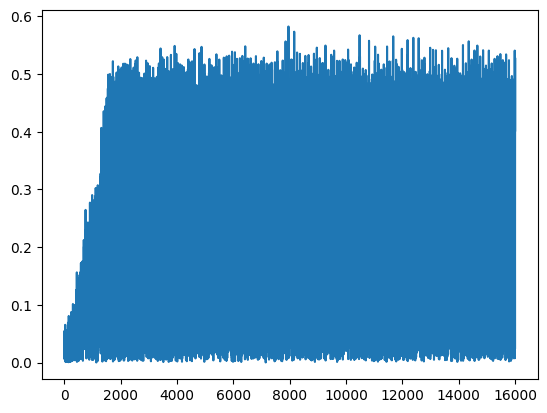

In [79]:
plt.plot(t,rs) 

In [80]:
G0 = Group_check(avg_dtheta,0,1000)
G1 = Group_check(avg_dtheta,1,1000)
G2 = Group_check(avg_dtheta,2,1000)
G3 = Group_check(avg_dtheta,3,1000)
G4 = Group_check(avg_dtheta,4,1000)
Gl = Group_check(avg_dtheta,'l',1000)
Gr = Group_check(avg_dtheta,'r',1000)

In [81]:
omega_p = lambda r,K=K,m=m : 4/np.pi*np.sqrt(K*r/m)
omega_d = lambda r,K,m=K : K*r

In [82]:
o_p = omega_p(np.mean(rs[-1000]),K,m)
o_d = omega_d(np.mean(rs[-1000]),K,m)

In [87]:
N//2

500

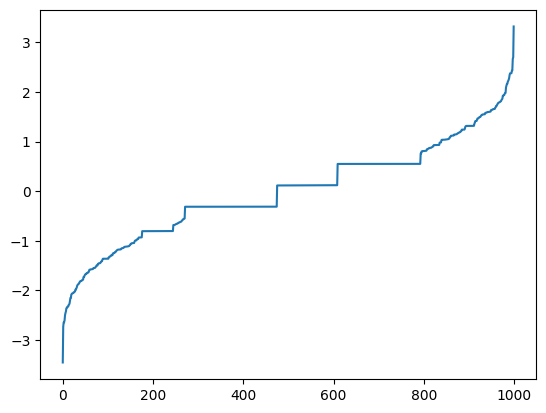

In [83]:
arg = np.argsort(avg_dtheta[-1])
plt.plot(avg_dtheta[-1][arg])

In [84]:
Group_check_near(avg_dtheta, -3,1000)

{'cluster_size': 8.876,
 'cluster_std': 5.5900468692131735,
 'dtheta_mean': -0.6342683290484282,
 'dtheta_std': 0.023097160354905406,
 'omega_mean': -0.647250415127731,
 'omega_std': 0.013293848619547176,
 'Is_group': False,
 'clsuter_size array': [7,
  7,
  7,
  7,
  7,
  7,
  7,
  7,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  19,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  14,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
 

In [85]:
Gn = lambda x: Group_check_near(avg_dtheta, x,1000)

In [86]:
Keys = G0.keys()
print(Keys)
for check_ in Keys:
    if 'array' not in check_:
        print('#####'*10)
        print(f'{check_} : G0 G1 G2 G3 Gl Gr\n',G0[check_], G1[check_],G2[check_],G3[check_],G4[check_])
        print(f'{check_} :Gl G0 Gr\n',Gl[check_],G0[check_],Gr[check_])
        print(f'{check_} :Gn-3 Gn-2 Gn-2 Gn-1 Gn0 Gn1 Gn2 Gn3\n',Gn(-3)[check_],Gn(-2)[check_],Gn(-1)[check_],Gn(0)[check_],Gn(1)[check_],Gn(2)[check_],Gn(3)[check_])


dict_keys(['cluster_size', 'cluster_std', 'dtheta_mean', 'dtheta_std', 'omega_mean', 'omega_std', 'Is_group', 'clsuter_size array', 'mean_dtheta array', 'std_dtheta array', 'mean_omega array', 'std_omega array', 'cluster_indexs array'])
##################################################
cluster_size : G0 G1 G2 G3 Gl Gr
 204.0 184.0 134.0 69.0 20.61
cluster_size :Gl G0 Gr
 3.601 204.0 134.0
cluster_size :Gn-3 Gn-2 Gn-2 Gn-1 Gn0 Gn1 Gn2 Gn3
 8.876 5.597 3.601 204.0 134.0 184.0 2.0
##################################################
cluster_std : G0 G1 G2 G3 Gl Gr
 0.0 0.0 0.0 0.0 0.9507365565707464
cluster_std :Gl G0 Gr
 1.1134626172440636 0.0 0.0
cluster_std :Gn-3 Gn-2 Gn-2 Gn-1 Gn0 Gn1 Gn2 Gn3
 5.5900468692131735 6.562209307847471 1.1134626172440636 0.0 0.0 0.0 0.0
##################################################
dtheta_mean : G0 G1 G2 G3 Gl Gr
 -0.3039501203599222 0.5453620829708525 0.11237222863147132 -0.8041959462528683 0.8567182778059038
dtheta_mean :Gl G0 Gr
 -0.5696893420190147 

In [20]:
np.std(Sizes)

0.0

In [ ]:
cm,cl,cr = [], [],[]
Om,Ol,Or = [], [],[]
Sm,Sl,Sr = [], [],[]


c1,c2 = [], []
O1,O2 = [], []
S1,S2 = [], []

for i in range(len(t)-sum_time-1000,len(t)-sum_time):
    index = i
    arg = np.argsort(avg_dtheta[index])
    SD = avg_dtheta[index][arg]
    diff_dtheta = np.diff([SD[0],*SD])
    peaks, P  = find_peaks(diff_dtheta, height=0.01)
    C_0,S_0 = get_cluster(peaks,0)
    C_1,S_1 = get_cluster(peaks,1)
    C_2,S_2 = get_cluster(peaks,2)
    l_c,r_c = near_main(peaks)
    cluster_0 = arg[C_0[0]:C_0[1]]
    cluster_1 = arg[C_1[0]:C_1[1]]
    cluster_2 = arg[C_2[0]:C_2[1]]
    cluster_l = arg[l_c[0]:l_c[1]]
    cluster_r = arg[r_c[0]:r_c[1]]
    O_m = np.mean(avg_dtheta[index][cluster_0])
    O_1 = np.mean(avg_dtheta[index][cluster_1])
    O_2 = np.mean(avg_dtheta[index][cluster_2])
    O_l = np.mean(avg_dtheta[index][cluster_l])
    O_r = np.mean(avg_dtheta[index][cluster_r])
    std_m = np.std(avg_dtheta[index][cluster_0])
    std_l = np.std(avg_dtheta[index][cluster_l])
    std_r = np.std(avg_dtheta[index][cluster_r])
    std_1 = np.std(avg_dtheta[index][cluster_1])
    std_2 = np.std(avg_dtheta[index][cluster_2])
    
    cm.append(len(cluster_0))
    c1.append(len(cluster_1))
    c2.append(len(cluster_2))
    cl.append(len(cluster_l))
    cr.append(len(cluster_r))
    Om.append(O_m)
    O1.append(O_1)
    O2.append(O_2)
    Ol.append(O_l)
    Or.append(O_r)
    
    Sm.append(std_m)
    S1.append(std_1)
    S2.append(std_2)
    Sl.append(std_l)
    Sr.append(std_r)

In [155]:
np.std(cm),np.std(cl),np.std(cr),np.std(c1),np.std(c2)

(0.0, 0.0, 0.0, 0.0, 0.0)

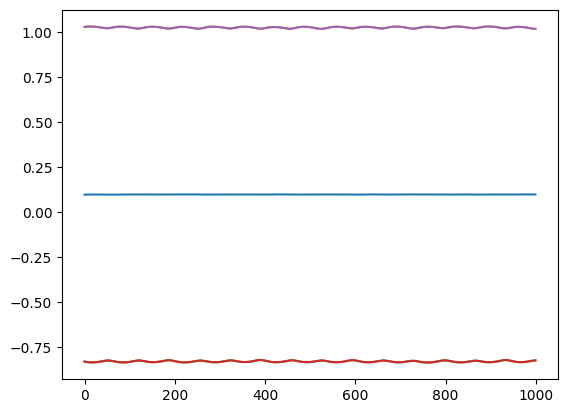

In [156]:
plt.plot(G0[''])
plt.plot(G0[''])
plt.plot(G0[''])
plt.plot(G0[''])
plt.plot(G0[''])


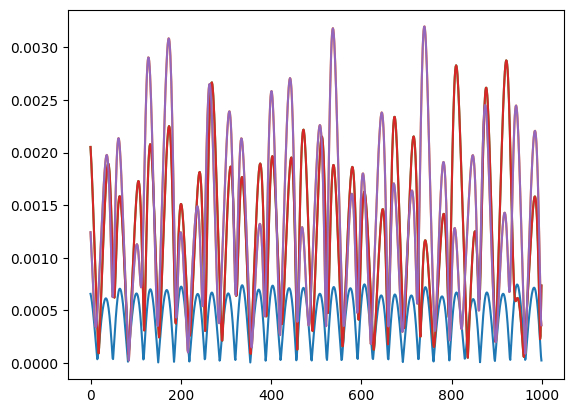

In [157]:
plt.plot(Sm)
plt.plot(Sr)
plt.plot(Sl)
plt.plot(S1)
plt.plot(S2)

In [148]:
# cluster를 확인해 볼때, 양옆의 클러스터가 계속적으로 유지되어야 의미가 있기 때문에
# 개수가 변하면은 클러스터가 없다고 생각하고 0으로 바꾸는 코드로 수정을 해야 할듯

In [309]:
dm = 'dtheta_mean'
G0[dm] - G2[dm],G0[dm] - G1[dm]

(0.5694362312787102, -0.5605413676035452)